# Section 05 - Aerocapture Entry Corridor and Limiting Trajectories

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# setup the Planet object
from AMAT.planet import Planet
planet=Planet("URANUS")
planet.h_skip = 1000e3
planet.loadAtmosphereModel('../../../atmdata/Uranus/uranus-gram-avg.dat', 0 , 1 ,2, 3, heightInKmFlag=True)
planet.h_low = 120e3
planet.h_trap= 100e3

In [3]:
# Setup the vehicle object 
from AMAT.vehicle import Vehicle
vehicle=Vehicle('Titania', 3200.0, 146 , 0.24, np.pi*4.5**2.0, 0.0, 1.125, planet)
vehicle.setInitialState(1000.0,-15.22,36.51,29.3597,85.7789,-11.0 ,0.0,0.0)
vehicle.setSolverParams(1E-6)

In [4]:
# Compute the corridor bounds and TCW
overShootLimit, exitflag_os  = vehicle.findOverShootLimit2(2400.0,0.1,-25,-4.0,1E-10,500e3)
underShootLimit, exitflag_us  = vehicle.findUnderShootLimit2(2400.0,0.1,-25 ,-4.0,1E-10,500e3)

In [5]:
# print the overshoot and undershoot limits we just computed.
print("Overshoot  limit : "+str('{:.4f}'.format(overShootLimit))+ " deg")
print("Undershoot limit : "+str('{:.4f}'.format(underShootLimit))+ " deg")
print("TCW: "+ str('{:.4f}'.format(overShootLimit-underShootLimit))+ " deg")

Overshoot  limit : -10.9669 deg
Undershoot limit : -11.9801 deg
TCW: 1.0132 deg


In [6]:
# propogate the overshoot and undershoot trajectories
vehicle.setInitialState(1000.0,-15.22,36.51,29.3597,85.7789,overShootLimit ,0.0,0.0)
vehicle.propogateEntry (2400.0,0.1,180.0)

# Extract and save variables to plot
t_min_os         = vehicle.t_minc
h_km_os          = vehicle.h_kmc
acc_net_g_os     = vehicle.acc_net_g
q_stag_con_os    = vehicle.q_stag_con
q_stag_rad_os    = vehicle.q_stag_rad
heatload_os      = vehicle.heatload

vehicle.setInitialState(1000.0,-15.22,36.51,29.3597,85.7789,underShootLimit ,0.0,0.0)
vehicle.propogateEntry (2400.0,0.1,0.0)

# Extract and save variable to plot
t_min_us         = vehicle.t_minc
h_km_us          = vehicle.h_kmc
acc_net_g_us     = vehicle.acc_net_g
q_stag_con_us    = vehicle.q_stag_con
q_stag_rad_us    = vehicle.q_stag_rad
heatload_us      = vehicle.heatload

<Figure size 640x480 with 0 Axes>

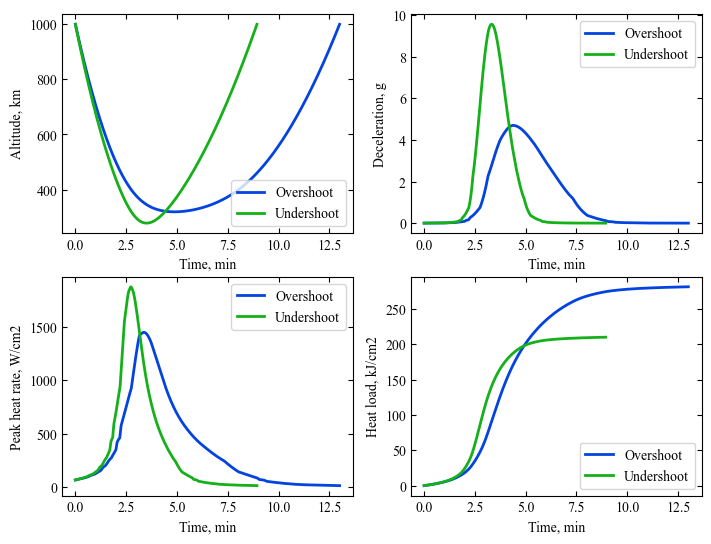

In [7]:
# plot overshoot and undershoot trajectories
fig = plt.figure()
fig = plt.figure()
fig.set_size_inches([8.25,6.25])
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)


plt.subplot(2, 2, 1)
plt.plot(t_min_os , h_km_os, linestyle='solid' , color='xkcd:blue',linewidth=2.0,  label='Overshoot')
plt.plot(t_min_us , h_km_us, linestyle='solid' , color='xkcd:green',linewidth=2.0,  label='Undershoot')
plt.xlabel('Time, min',fontsize=10)
plt.ylabel("Altitude, km",fontsize=10)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.tick_params(direction='in')
plt.tick_params(axis='x',labelsize=10)
plt.tick_params(axis='y',labelsize=10)
plt.legend(loc='lower right', fontsize=10)


plt.subplot(2, 2, 2)
plt.plot(t_min_os , acc_net_g_os , linestyle='solid' , color='xkcd:blue',linewidth=2.0,  label='Overshoot')
plt.plot(t_min_us , acc_net_g_us, linestyle='solid' , color='xkcd:green',linewidth=2.0,  label='Undershoot')
plt.xlabel('Time, min',fontsize=10)
plt.ylabel("Deceleration, g",fontsize=10)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.tick_params(direction='in')
plt.tick_params(axis='x',labelsize=10)
plt.tick_params(axis='y',labelsize=10)
plt.legend(loc='upper right', fontsize=10)

plt.subplot(2, 2, 3)
plt.plot(t_min_os , q_stag_con_os+q_stag_rad_os, linestyle='solid' , color='xkcd:blue',linewidth=2.0,  label='Overshoot')
plt.plot(t_min_us , q_stag_con_us+q_stag_rad_us, linestyle='solid' , color='xkcd:green',linewidth=2.0,  label='Undershoot')
plt.xlabel('Time, min',fontsize=10)
plt.ylabel("Peak heat rate, W/cm2",fontsize=10)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.tick_params(direction='in')
plt.tick_params(axis='x',labelsize=10)
plt.tick_params(axis='y',labelsize=10)
plt.legend(loc='upper right', fontsize=10)

plt.subplot(2, 2, 4)
plt.plot(t_min_os , heatload_os/1e3 , linestyle='solid' , color='xkcd:blue',linewidth=2.0,  label='Overshoot')
plt.plot(t_min_us , heatload_us/1e3, linestyle='solid' , color='xkcd:green',linewidth=2.0,  label='Undershoot')
plt.xlabel('Time, min',fontsize=10)
plt.ylabel("Heat load, kJ/cm2",fontsize=10)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.tick_params(direction='in')
plt.tick_params(axis='x',labelsize=10)
plt.tick_params(axis='y',labelsize=10)
plt.legend(loc='lower right', fontsize=10)

#plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/uranus-ac-limiting-trajectories.png', dpi= 300,bbox_inches='tight')
#plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/uranus-ac-limiting-trajectories.pdf', dpi=300,bbox_inches='tight')
#plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/uranus-ac-limiting-trajectories.eps', dpi=300,bbox_inches='tight')


plt.show()